# Use Kurukz

In [1]:
from dustapprox.io import svo
import numpy as np
import pickle
from scipy.interpolate import CubicSpline
from scipy.interpolate import RegularGridInterpolator
import extinction as ext
from astropy.constants import R_sun,pc
import matplotlib.pyplot as plt

In [2]:
which_filters = ['GAIA/GAIA3.G','GAIA/GAIA3.Gbp', 'GAIA/GAIA3.Grp','2MASS/2MASS.J', '2MASS/2MASS.H', '2MASS/2MASS.Ks','WISE/WISE.W1','WISE/WISE.W2']
passbands = svo.get_svo_passbands(which_filters)
pb_interp=[]

for pb in passbands:
    pb_interp.append(CubicSpline(np.array(pb.wavelength)*10,pb.transmit,extrapolate=False))

passband_zeropoint_vega=np.array([pk.Vega_zero_flux.value for pk in passbands])


In [3]:
from glob import glob

loc='/Users/mattocallaghan/VaeStar/Isochrones_data/Kurucz2003all/*.fl.dat.txt'
models = glob(loc)

In [4]:
import astropy.units as u

In [5]:
passbands[0].get_flux(np.linspace(0,10000,10000)*u.nm,1*np.linspace(0,10000,10000)*u.erg)

UnitConversionError: 'erg' (energy/torque/work) and 'flam' (power density/spectral flux density wav) are not convertible

In [ ]:
passbands[0].apply_transmission(np.linspace(0,10000,1000000)*u.nm,1).sum()

31732.36174144315

In [ ]:
import astropy.units as u

(0.0, 10000.0)

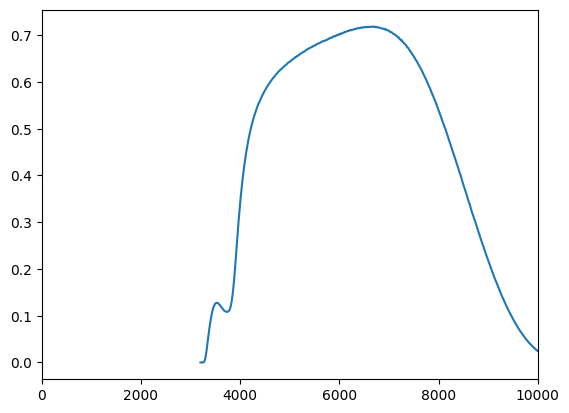

In [ ]:
#plt.plot(wl[700],fluxes[700]*u.)
plt.plot(passbands[0].wavelength*10,passbands[0].transmit)
plt.xlim(0,10000)

In [ ]:
passbands[0].wavelength_unit

'nm'

In [ ]:
np.array([passband.Vega_zero_flux.value for passband in passbands])

array([2.50649433e-09, 4.06966690e-09, 1.27871752e-09, 3.14212353e-10,
       1.14415173e-10, 4.30549622e-11, 8.23825931e-12, 2.43140823e-12])

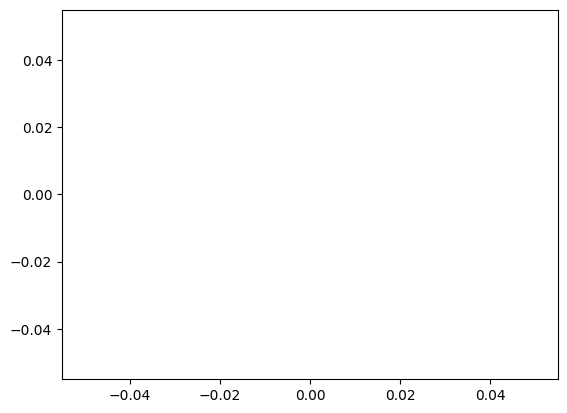

In [ ]:
plt.plot(passbands[0].wavelength,pb_interp[0](passbands[0].wavelength))
plt.plot(passbands[0].wavelength,passbands[0].transmit-pb_interp[0](passbands[0].wavelength))

In [ ]:
passbands[0].get_flux()

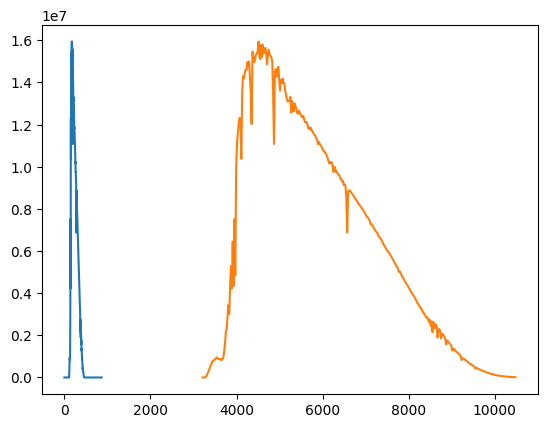

In [ ]:
plt.plot(passbands[0].apply_transmission(wl[30]*lamb_unit,fluxes[30]))
plt.plot(wl[30]*lamb_unit,fluxes[30]*pb_interp[0](wl[30]*lamb_unit))

In [ ]:
from glob import glob

loc='/Users/mattocallaghan/VaeStar/Isochrones_data/Kurucz2003all/*.fl.dat.txt'
models = glob(loc)
apfields = ['teff', 'logg', 'feh', 'alpha']
wl=[]
fehs=[]
logg=[]
teff=[]
fluxes=[]

label = 'teff={teff:4g} K, logg={logg:0.1g} dex, [Fe/H]={feh:0.1g} dex'
for fname in models[0:1]:
    data = svo.spectra_file_reader(fname)
    lamb_unit, flux_unit = svo.get_svo_sprectum_units(data)

    lamb = data['data']['WAVELENGTH'].values * lamb_unit
    truth=(data['data']['WAVELENGTH']<60000)*(data['data']['WAVELENGTH']>2000)
    data['data'][truth]
    if(data['alpha']['value']==0.0):
        wl.append(data['data'][truth]['WAVELENGTH'].values)#.reshape(-1, 2).mean(-1))
        fluxes.append(data['data'][truth]['FLUX'].values)#.reshape(-1, 2).mean(-1))
        fehs.append(data['feh']['value'])
        logg.append(data['logg']['value'])
        teff.append(data['teff']['value'])
        #flux=flux*curves[1](data['data']['WAVELENGTH'].values * lamb_unit,av,Rv=Rv)

In [ ]:
flux_unit

Unit("erg / (Angstrom cm2 s)")

In [ ]:

  
pars=np.stack([np.array(fehs),np.array(logg),np.array(teff)]).T
feh_unique=np.unique(np.array(fehs))
logg_unique=np.unique(np.array(logg))
teff_unique=np.unique(np.array(teff))
parameters=np.stack(np.meshgrid(feh_unique,logg_unique,teff_unique,indexing='ij'),axis=-1)
flux_grid=(np.zeros((parameters.shape[:-1]+(len(wl[0]),)))*np.NaN)
indices=[]
for i,j,k in np.ndindex((parameters.shape[0:-1])):
    try:
        idx=np.where([(np.prod(pars[_]==parameters[i,j,k])) for _ in range(len(pars))])[0]
        
        flux_grid[i,j,k]=fluxes[int(idx)]
        indices.append(np.array([i,j,k]))
    except:
        continue

interp=RegularGridInterpolator((feh_unique,logg_unique,teff_unique),flux_grid,method='linear',
                                bounds_error=False, fill_value=np.NaN)   

IndexError: list index out of range

In [ ]:
flux_unit

Unit("erg / (Angstrom cm2 s)")

In [ ]:
flux_unit.find_equivalent_units()

Primary name,Unit definition,Aliases
ST,0.0363078 kg / (m s3),STflux
flam,1e+07 kg / (m s3),


In [ ]:
pars=np.stack([np.array(fehs),np.array(logg),np.array(teff)]).T
feh_unique=np.unique(np.array(fehs))
logg_unique=np.unique(np.array(logg))
teff_unique=np.unique(np.array(teff))
parameters=np.stack(np.meshgrid(feh_unique,logg_unique,teff_unique,indexing='ij'),axis=-1)
flux_grid=(np.zeros((parameters.shape[:-1]+(len(wl[0]),)))*np.NaN)

In [ ]:
import astropy.units as u

In [ ]:
lamb_unit.to(u.nm)*wl[0]

array([ 200.5,  201.5,  202.5,  203.5,  204.5,  205.5,  206.5,  207.4,
        207.8,  208.5,  209.5,  210.5,  211.5,  212.5,  213.5,  214.5,
        215.5,  216.5,  217.5,  218.5,  219.5,  220.5,  221.5,  222.5,
        223.5,  224.5,  225.5,  226.5,  227.5,  228.5,  229.5,  230.5,
        231.5,  232.5,  233.5,  234.5,  235.5,  236.5,  237.5,  238.5,
        239.5,  240.5,  241.5,  242.5,  243.5,  244.5,  245.5,  246.5,
        247.5,  248.5,  249.5,  250.5,  251.3,  251.8,  252.5,  253.5,
        254.5,  255.5,  256.5,  257.5,  258.5,  259.5,  260.5,  261.5,
        262.5,  263.5,  264.5,  265.5,  266.5,  267.5,  268.5,  269.5,
        270.5,  271.5,  272.5,  273.5,  274.5,  275.5,  276.5,  277.5,
        278.5,  279.5,  280.5,  281.5,  282.5,  283.5,  284.5,  285.5,
        286.5,  287.5,  288.5,  289.5,  291. ,  293. ,  295. ,  297. ,
        299. ,  301. ,  303. ,  305. ,  307. ,  309. ,  311. ,  313. ,
        315. ,  317. ,  319. ,  321. ,  323. ,  325. ,  327. ,  329. ,
      

In [ ]:
indices=[]
for i,j,k in np.ndindex((parameters.shape[0:-1])):
    try:
        idx=np.where([(np.prod(pars[_]==parameters[i,j,k])) for _ in range(len(pars))])[0]
        
        flux_grid[i,j,k]=fluxes[int(idx)]
        indices.append(np.array([i,j,k]))
    except:
        continue

interp=RegularGridInterpolator((feh_unique,logg_unique,teff_unique),flux_grid,method='linear',
                                bounds_error=False, fill_value=np.NaN)   

# Test fits pheonix


In [1]:
import fitsio as fits

In [6]:
import pandas as pd
import astropy.io.fits
import numpy as np

In [7]:
par=fits.read('/Users/mattocallaghan/SEDNest/Data/Phoenix/phoenixm00_2000.fits',columns=['WAVELENGTH','g00','g05','g10','g15','g20','g25','g30','g35','g40','g45','g50','g55'])
temp_file=astropy.io.fits.open('/Users/mattocallaghan/SEDNest/Data/Phoenix/phoenixm00_2000.fits')
par=pd.DataFrame(np.stack(np.array(par,dtype=object)).astype(float),columns=[['WAVELENGTH','g00','g05','g10','g15','g20','g25','g30','g35','g40','g45','g50','g55']][::-1])
par['TEFF']=temp_file[0].header['TEFF']
par['MH']=temp_file[0].header['METAL10']
par['WL_UNIT']=temp_file[1].header['TUNIT1']
par['FLUX_UNIT']=temp_file[1].header['TUNIT2']

In [8]:
par1=fits.read('/Users/mattocallaghan/SEDNest/Data/Phoenix/phoenixm05_5000.fits',columns=['WAVELENGTH','g00','g05','g10','g15','g20','g25','g30','g35','g40','g45','g50','g55'])
temp_file1=astropy.io.fits.open('/Users/mattocallaghan/SEDNest/Data/Phoenix/phoenixm05_5000.fits')
par1=pd.DataFrame(np.stack(np.array(par1,dtype=object)).astype(float),columns=[['WAVELENGTH','g00','g05','g10','g15','g20','g25','g30','g35','g40','g45','g50','g55']][::-1])
par1['TEFF']=temp_file1[0].header['TEFF']
par1['WL_UNIT']=temp_file1[1].header['TUNIT1']
par1['FLUX_UNIT']=temp_file1[1].header['TUNIT2']

try:
    par1['MH']=temp_file1[0].header['METAL10']
except:
    par1['MH']=temp_file1[0].header['LOG_Z']

In [ ]:
x=astropy.io.fits.open('/Users/mattocallaghan/SEDNest/Data/Phoenix/catalog.fits')

In [ ]:
x[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   80 / length of dimension 1                          
NAXIS2  =                18636 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    2 / number of table fields                         
TTYPE1  = 'INDEX   '                                                            
TFORM1  = '20A     '                                                            
TTYPE2  = 'FILENAME'                                                            
TFORM2  = '60A     '                                                            

(0.0, 60000.0)

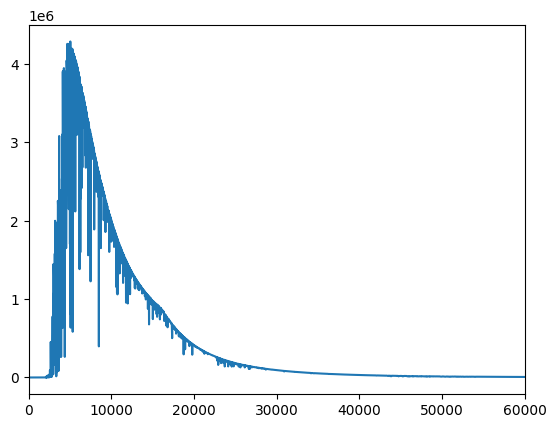

In [ ]:
#plt.plot(par['WAVELENGTH'],par['g40']/par['g40'].max())
plt.plot(par1['WAVELENGTH'],par1['g25'])
plt.xlim(0,60000)

In [4]:
wavelength_cut=706247


In [145]:
import glob
from scipy.interpolate import CubicSpline
import numpy as np
import pandas as pd
import astropy.io.fits
import pickle
folder_path = '/Users/mattocallaghan/SEDNest/Data/Phoenix/'
file_pattern = '*.fits'

# Get a list of all FITS files in the folder
fits_files = glob.glob(folder_path + file_pattern)
def fitsread(fits_file,columns):
    try: 
        par=fits.read(fits_file,columns=columns)
        return par, columns
    except:
        columns=columns[:-1]
        return fitsread(fits_file,columns)

wavelength_cut=706247
#This is the one with the smaller wavelenghts. We need this because solar isochrones have many sampled points and we want the same
par1=fits.read('/Users/mattocallaghan/SEDNest/Data/Phoenix/phoenixm05_5000.fits',columns=['WAVELENGTH'])
temp_file1=astropy.io.fits.open('/Users/mattocallaghan/SEDNest/Data/Phoenix/phoenixm05_5000.fits')
wavelengths=pd.DataFrame(np.stack(np.array(par1,dtype=object)).astype(float),columns=['WAVELENGTH'])
wavelengths=wavelengths[wavelengths['WAVELENGTH'].values<wavelength_cut].values[:,0] # weird shape

tests=[]
lens=[]
dfs=[]
teffs=[]
fehs=[]
wl=[]
fluxes=[]
logg_names = {'g00':0.0,'g05':0.5,'g10':1.0,'g15':1.5,'g20':2.0,'g25':2.5,'g30':3.0,'g35':3.5,'g40':4.0,'g45':4.5,'g50':5.0,'g55':5.5,'60':6.0}
# Open each FITS file
flag=True
for fits_file in fits_files:
    temp_file1=astropy.io.fits.open(fits_file)
    if(float(temp_file1[0].header['TEFF'])<10000):
        columns=['WAVELENGTH','g00','g05','g10','g15','g20','g25','g30','g35','g40','g45','g50','g55','60']

        spectrum,columns=fitsread(fits_file,columns=columns)
        
        
        spectrum=np.stack(np.array(spectrum,dtype=object)).astype(float)

        spectrum=pd.DataFrame(np.stack(np.array(spectrum,dtype=object)),columns=[columns][::-1]).astype(float)
        spectrum=spectrum[spectrum['WAVELENGTH'].values<wavelength_cut] # this cut should be fine for us becasue of our passbands

        
        if(len(spectrum)!=len(wavelengths)):
            new_spectrum=pd.DataFrame(wavelengths,columns=[columns[0]])
            for column in columns[1:]:
                cs = CubicSpline(spectrum['WAVELENGTH'].values.reshape(len(spectrum)), spectrum[column].values[:,0])
                new_spectrum[column]=cs(wavelengths) # weird shape of column values
                
            spectrum=new_spectrum



        for column in columns[1:]:
            dict_pars={'LOGG':logg_names[column],'TEFF':float(temp_file1[0].header['TEFF']),
                                'WL_UNIT':temp_file1[1].header['TUNIT1'],'FLUX_UNIT':temp_file1[1].header['TUNIT2']}
            new_spectrum=pd.DataFrame(dict_pars,index=[0])

            #new_spectrum['FLUX']=spectrum[column].values #weird shape
            #new_spectrum['LOGG']=logg_names[column]
            #new_spectrum['TEFF']=float(temp_file1[0].header['TEFF'])
            #new_spectrum['WL_UNIT']=temp_file1[1].header['TUNIT1']
            #new_spectrum['FLUX_UNIT']=temp_file1[1].header['TUNIT2']
            
            if(flag):
                fluxes=spectrum[column].values.astype(float).reshape(len(spectrum))[None,:]
                flag=False
            else:
                f=spectrum[column].astype(float).values.reshape(len(spectrum))[None,:]
                fluxes=np.concatenate([fluxes,f],axis=0)
            

            #fluxes.append(spectrum[column].values)

            teffs.append(temp_file1[0].header['TEFF'])
            
            try:
                new_spectrum['MH']=float(temp_file1[0].header['METAL10'])
                fehs.append(temp_file1[0].header['METAL10'])
            except:
                new_spectrum['MH']=float(temp_file1[0].header['LOG_Z'])
                fehs.append(temp_file1[0].header['LOG_Z'])
            dfs.append(new_spectrum.reset_index(drop=True))

spectra=pd.concat(dfs)
sp_zero_flux=spectra#[spectra['FLUX']>0]
sp_zero_flux.to_csv('../Data/phoenix_with_cuts')

with open('../Data/phoenix_fluxes', 'wb') as file:
           pickle.dump(fluxes, file)


In [146]:
spectra

,LOGG,TEFF,WL_UNIT,FLUX_UNIT,MH
0,0.0,6900.0,ANGSTROM,FLAM,-4.0
0,0.5,6900.0,ANGSTROM,FLAM,-4.0
0,1.0,6900.0,ANGSTROM,FLAM,-4.0
0,1.5,6900.0,ANGSTROM,FLAM,-4.0
0,2.0,6900.0,ANGSTROM,FLAM,-4.0
...,...,...,...,...,...
0,3.5,3500.0,ANGSTROM,FLAM,-4.0
0,4.0,3500.0,ANGSTROM,FLAM,-4.0
0,4.5,3500.0,ANGSTROM,FLAM,-4.0
0,5.0,3500.0,ANGSTROM,FLAM,-4.0


In [126]:
fluxes.shape

(1, 4255)

In [1]:
import seaborn as sn

In [13]:
import pandas as pd
sp_zero_flux=pd.read_csv('../Data/phoenix_with_cuts')

In [2]:

import pandas as pd
import numpy as np

In [5]:
import fitsio as fits
par1=fits.read('/Users/mattocallaghan/SEDNest/Data/Phoenix/phoenixm05_5000.fits',columns=['WAVELENGTH'])
wavelengths=pd.DataFrame(np.stack(np.array(par1,dtype=object)).astype(float),columns=['WAVELENGTH',])
wavelengths=wavelengths[wavelengths['WAVELENGTH'].values<wavelength_cut].values[:,0] # weird shape


In [25]:
import fitsio as fits
par1=fits.read('/Users/mattocallaghan/SEDNest/Data/Phoenix/phoenixm00_5000.fits',columns=['WAVELENGTH','g45'])
wavelengths=pd.DataFrame(np.stack(np.array(par1,dtype=object)).astype(float),columns=['WAVELENGTH','g45'])
#wavelengths=wavelengths[wavelengths['WAVELENGTH'].values<wavelength_cut].values[:,0] # weird shape


(300.0, 700.0)

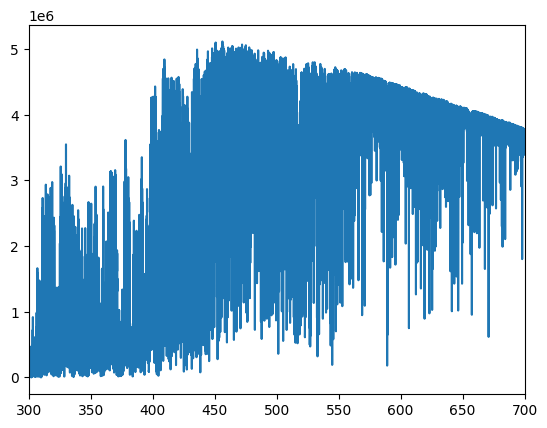

In [31]:
plt.plot(wavelengths['WAVELENGTH']*0.1,wavelengths['g45'])
plt.xlim(300,700)

In [9]:
import pickle

In [10]:
with open('Data/phoenix_fluxes', 'rb') as file:
    fluxes = pickle.load(file)

In [18]:
import matplotlib.pyplot as plt

(1400.0, 1600.0)

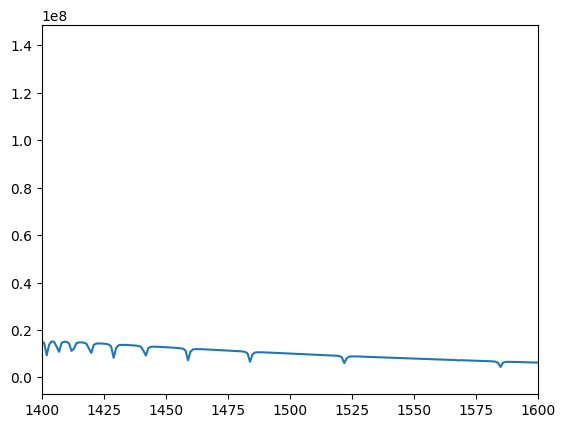

In [19]:
plt.plot(fluxes[1000])
plt.xlim(1400,1600)

In [30]:
with open('../Data/phoenix_fluxes', 'rb') as file:
    fluxes = pickle.load(file)

pars=np.stack([sp_zero_flux['MH'].astype(float).values,sp_zero_flux['LOGG'].astype(float).values,sp_zero_flux['TEFF'].astype(float).values]).T
feh_unique=np.unique(sp_zero_flux['MH'].astype(float).values)
logg_unique=np.unique(sp_zero_flux['LOGG'].astype(float).values)
teff_unique=np.unique(sp_zero_flux['TEFF'].astype(float).values)
#fluxes=sp_zero_flux['FLUX'].astype(float).values
parameters=np.stack(np.meshgrid(feh_unique,logg_unique,teff_unique,indexing='ij'),axis=-1)
flux_grid=(np.zeros((parameters.shape[:-1]+(len(wavelengths),)))*np.NaN)
indices=[]
for i,j,k in np.ndindex((parameters.shape[0:-1])):

    idx=np.where([(np.prod(pars[_]==parameters[i,j,k])) for _ in range(len(pars))])[0]
    if(len(idx)>0):
        f=fluxes[int(idx)]
        try:
            flux_grid[i,j,k]=fluxes[int(idx)][:,0]
            indices.append(np.array([i,j,k]))
        except:
            flux_grid[i,j,k]=fluxes[int(idx)][:]
            indices.append(np.array([i,j,k]))

    
from scipy.interpolate import RegularGridInterpolator
interp=RegularGridInterpolator((feh_unique,logg_unique,teff_unique),flux_grid,method='linear',
                                bounds_error=False, fill_value=np.NaN)  


In [20]:
with open('/interp_phoenix', 'wb') as file:
           pickle.dump(interp, file)

OSError: [Errno 30] Read-only file system: '/interp_phoenix'